In [2]:
!pip install tensorflow

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.1


In [3]:
# Import TensorFlow Datasets and the Fashion MNIST dataset
from tensorflow.keras.datasets import fashion_mnist

# Load the dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Print the shapes to verify the data
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Training labels shape: (60000,)
Test labels shape: (10000,)


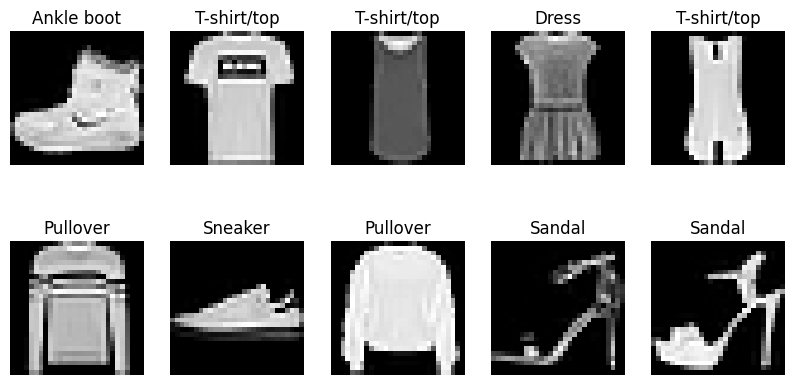

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Class labels for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot some sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()


In [5]:
# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten the images for ANN input
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Print the new shapes
print(f"Flattened training data shape: {X_train.shape}")
print(f"One-hot encoded training labels shape: {y_train.shape}")


Flattened training data shape: (60000, 784)
One-hot encoded training labels shape: (60000, 10)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build the ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),  # Input layer with 128 neurons
    Dropout(0.2),                                      # Dropout to prevent overfitting
    Dense(64, activation='relu'),                      # Hidden layer with 64 neurons
    Dropout(0.2),
    Dense(10, activation='softmax')                    # Output layer with 10 neurons (for 10 classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model
history = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=32,
                    validation_split=0.2,  # 20% of training data for validation
                    verbose=1)


Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7078 - loss: 0.8117 - val_accuracy: 0.8441 - val_loss: 0.4289
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8403 - loss: 0.4466 - val_accuracy: 0.8587 - val_loss: 0.3843
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8565 - loss: 0.4018 - val_accuracy: 0.8699 - val_loss: 0.3665
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8612 - loss: 0.3758 - val_accuracy: 0.8730 - val_loss: 0.3472
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8656 - loss: 0.3654 - val_accuracy: 0.8713 - val_loss: 0.3524
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8722 - loss: 0.3456 - val_accuracy: 0.8760 - val_loss: 0.3437
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8775 - loss: 0.3351 - val_accuracy: 0.8656 - val_loss: 0.3482
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8812 - loss: 0.325

In [8]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")


Test Accuracy: 0.88


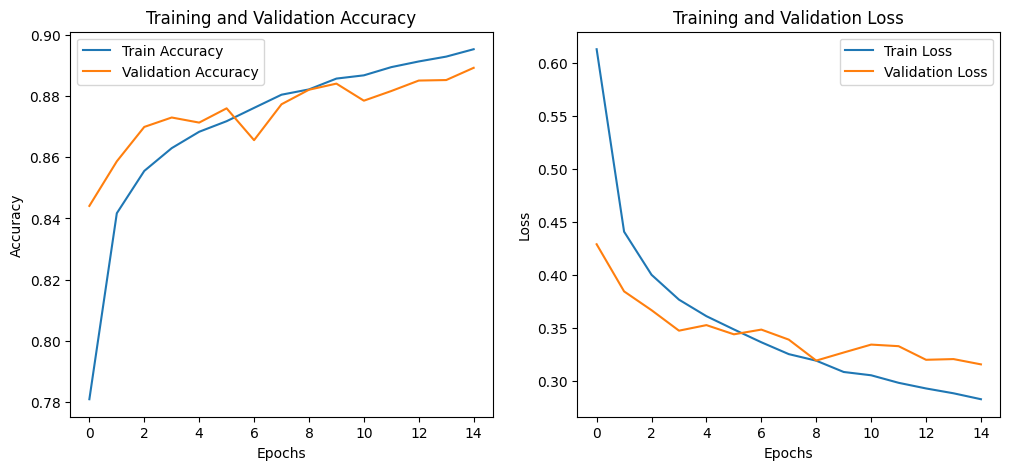

In [9]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


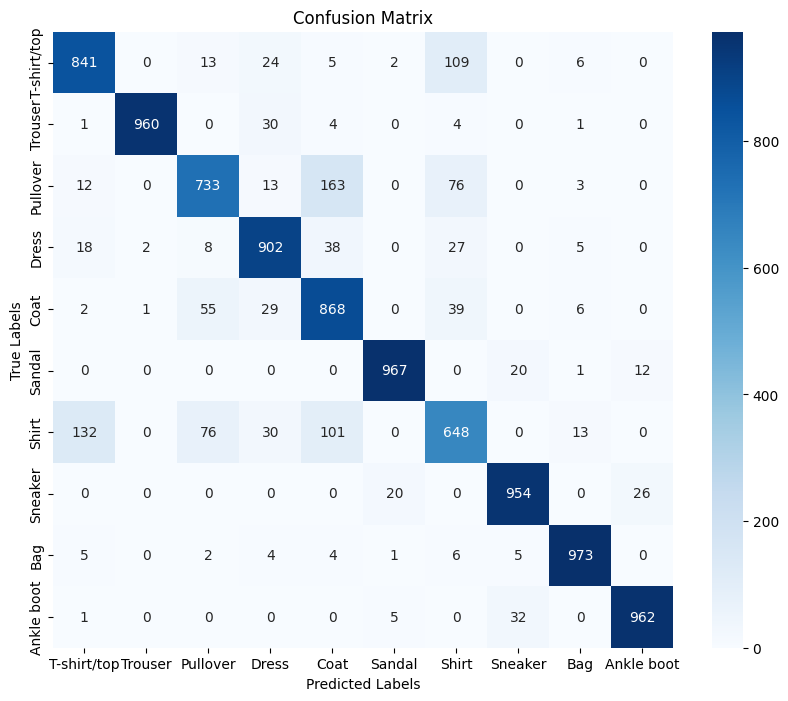

In [10]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict the test dataset
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [11]:
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_names))


Classification Report:

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.84      0.84      1000
     Trouser       1.00      0.96      0.98      1000
    Pullover       0.83      0.73      0.78      1000
       Dress       0.87      0.90      0.89      1000
        Coat       0.73      0.87      0.80      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.71      0.65      0.68      1000
     Sneaker       0.94      0.95      0.95      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [12]:
# Rebuild the model with adjusted learning rate
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dropout(0.3),  # Adjust dropout rate to 0.3
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Adjust the learning rate for Adam
optimizer = Adam(learning_rate=0.0005)  # Lower learning rate for fine-tuning

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=20,              # Increased epochs for deeper learning
                    batch_size=64,          # Larger batch size
                    validation_split=0.2,
                    verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.6362 - loss: 1.0484 - val_accuracy: 0.8336 - val_loss: 0.4602
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8161 - loss: 0.5225 - val_accuracy: 0.8526 - val_loss: 0.4048
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8358 - loss: 0.4627 - val_accuracy: 0.8618 - val_loss: 0.3846
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8472 - loss: 0.4277 - val_accuracy: 0.8620 - val_loss: 0.3724
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8567 - loss: 0.4015 - val_accuracy: 0.8712 - val_loss: 0.3512
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8617 - loss: 0.3842 - val_accuracy: 0.8748 - val_loss: 0.3490
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8692 - loss: 0.3687 - val_accuracy: 0.8777 - val_loss: 0.3386
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8701 - loss: 0.3604 - val_accuracy: 

In [13]:
from tensorflow.keras.optimizers import SGD

# Use SGD with a custom learning rate and momentum
optimizer = SGD(learning_rate=0.01, momentum=0.9)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_sgd = model.fit(X_train, y_train,
                        epochs=20,
                        batch_size=32,
                        validation_split=0.2,
                        verbose=1)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8784 - loss: 0.3302 - val_accuracy: 0.8733 - val_loss: 0.3627
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8798 - loss: 0.3228 - val_accuracy: 0.8698 - val_loss: 0.3587
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8765 - loss: 0.3303 - val_accuracy: 0.8829 - val_loss: 0.3233
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8797 - loss: 0.3232 - val_accuracy: 0.8812 - val_loss: 0.3293
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8845 - loss: 0.3069 - val_accuracy: 0.8788 - val_loss: 0.3307
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8864 - loss: 0.3092 - val_accuracy: 0.8864 - val_loss: 0.3234
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8851 - loss: 0.3050 - val_accuracy: 0.8792 - val_loss: 0.3383
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8870 - loss: 0.3058 -

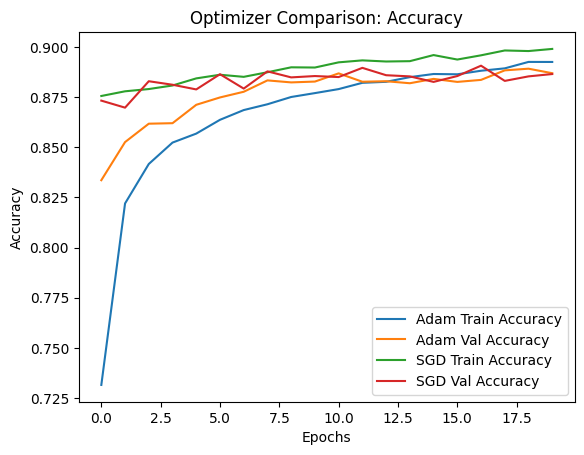

In [14]:
# Adam Optimizer Results
plt.plot(history.history['accuracy'], label='Adam Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Adam Val Accuracy')

# SGD Optimizer Results
plt.plot(history_sgd.history['accuracy'], label='SGD Train Accuracy')
plt.plot(history_sgd.history['val_accuracy'], label='SGD Val Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Optimizer Comparison: Accuracy')
plt.show()
